<a href="https://colab.research.google.com/github/Phornhathai/Nodelesson/blob/main/Linear_Regression_of_predicting_age_of_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set(style = 'dark')

In [107]:
raw_data = pd.read_csv('Car_Sales.csv')
data = raw_data.copy()

In [108]:
data.shape

(4345, 6)

Predict which range age will be buy car by 5 features -> Brand , Price , Age , Lifestyle and Model

In [109]:
data.head()


,Brand,Price,Body,Mileage,Interest_Finance,Year
0,Mitsubishi,4200.000,sedan,277,2.000,1991
1,Isuzu,7900.000,van,427,2.900,1999
2,Isuzu,13300.000,sedan,358,5.000,2003
3,Mazda,23000.000,crossover,240,4.200,2007
4,Toyota,18300.000,crossover,120,2.000,2011


In [110]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,Interest_Finance,Year
count,4345,4173.000,4345,4345.000,4195.000,4345.000
unique,5,nan,6,nan,nan,nan
top,Mitsubishi,nan,sedan,nan,nan,nan
freq,1021,nan,1649,nan,nan,nan
mean,NaN,19418.747,NaN,161.237,2.791,2006.550
std,NaN,25584.243,NaN,105.706,5.066,6.719
min,NaN,600.000,NaN,0.000,0.600,1969.000
25%,NaN,6999.000,NaN,86.000,1.800,2003.000
50%,NaN,11500.000,NaN,155.000,2.200,2008.000
75%,NaN,21700.000,NaN,230.000,3.000,2012.000


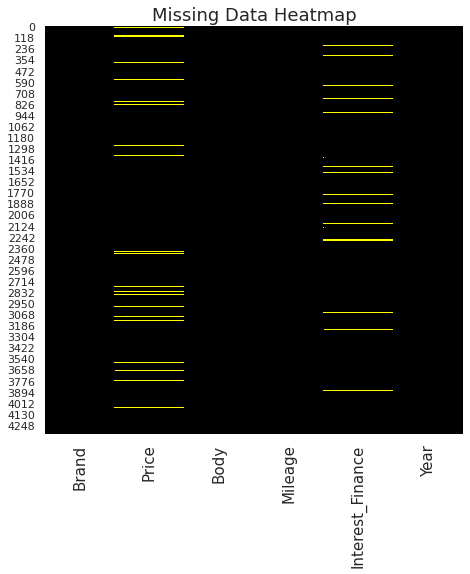

In [111]:
plt.figure(figsize = (7.5, 7.5))
plt.title('Missing Data Heatmap', fontsize = 18)
plt.xticks(fontsize = 15)
sns.heatmap(data.isnull(), cbar = False, cmap = 'gnuplot')
plt.show()

In [112]:
data.isnull().sum()

Brand                 0
Price               172
Body                  0
Mileage               0
Interest_Finance    150
Year                  0
dtype: int64

In [113]:
data = data.dropna()

In [114]:
data.isnull().sum()

Brand               0
Price               0
Body                0
Mileage             0
Interest_Finance    0
Year                0
dtype: int64

In [115]:
data_noNULL = data.copy()

In [116]:
data_noNULL['Brand'].describe()

count       4025
unique         5
top       Toyota
freq         955
Name: Brand, dtype: object

In [117]:
data_noNULL['Price'].describe()

count     4025.000
mean     19552.308
std      25815.735
min        600.000
25%       6999.000
50%      11500.000
75%      21900.000
max     300000.000
Name: Price, dtype: float64

In [118]:
data_noNULL['Body'].describe()

count      4025
unique        6
top       sedan
freq       1534
Name: Body, dtype: object

In [119]:
data_noNULL['Interest_Finance'].describe()

count   4025.000
mean       2.765
std        4.936
min        0.600
25%        1.800
50%        2.200
75%        3.000
max       99.990
Name: Interest_Finance, dtype: float64

In [120]:
data_Interest_Finance = data_noNULL[data_noNULL.Interest_Finance <15 ]

In [121]:
data_Interest_Finance['Interest_Finance'].describe()

count   4005.000
mean       2.471
std        0.984
min        0.600
25%        1.800
50%        2.200
75%        3.000
max        9.000
Name: Interest_Finance, dtype: float64

In [122]:
data_noNULL['Mileage'].describe()

count   4025.000
mean     163.572
std      103.395
min        0.000
25%       90.000
50%      158.000
75%      230.000
max      980.000
Name: Mileage, dtype: float64

In [123]:
data_noNULL['Year'].describe()

count   4025.000
mean    2006.380
std        6.696
min     1969.000
25%     2003.000
50%     2007.000
75%     2012.000
max     2016.000
Name: Year, dtype: float64

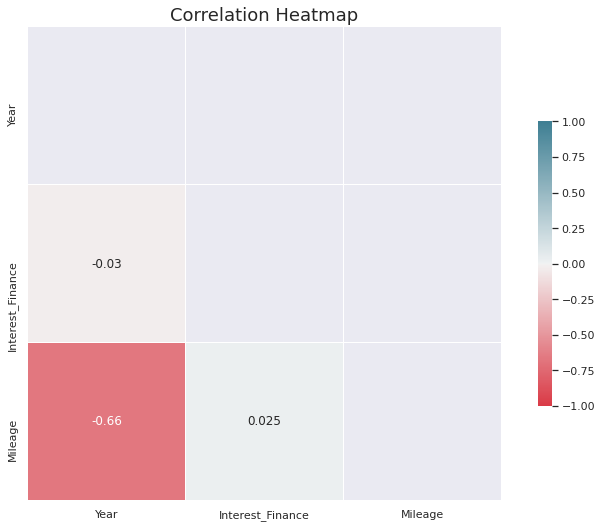

In [124]:
plt.figure(figsize = (10.5,7.5), tight_layout = True)
plt.title('Correlation Heatmap', fontsize = 18)
corr = data_noNULL[['Year','Interest_Finance','Mileage']].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(corr, 
            cmap = cmap, 
            mask = mask, 
            center = 0, 
            vmax = 1, 
            vmin = -1, 
            square = True, 
            linewidths = 0.5, 
            cbar_kws={"shrink": 0.6},
            annot = True,
)
plt.show()

High VIF can be safely ignored

In [125]:
variables = data_noNULL[['Interest_Finance' , 'Year', 'Mileage']]
vif_df = pd.DataFrame(variables.columns.values, columns = ['Feature'])
vif_df['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif_df

,Feature,VIF
0,Interest_Finance,1.315
1,Year,3.748
2,Mileage,3.481


Transformation

In [126]:
data_noNULL['logPrice'] = np.log(data_noNULL.Price)
data_noNULL.drop('Price', axis = 1, inplace = True)

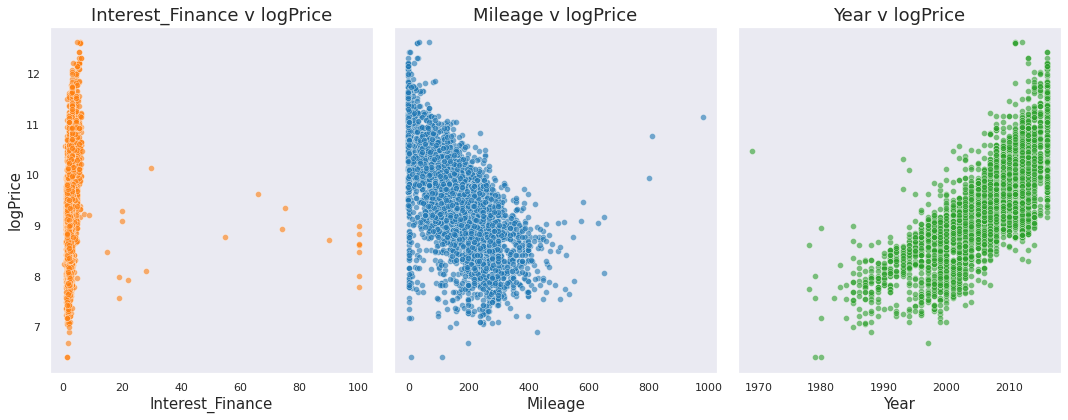

In [127]:
fig, (ax1 , ax2 , ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6), sharey = True)
sns.scatterplot(x = data_noNULL.Interest_Finance, y = data_noNULL.logPrice, color = 'tab:orange', ax= ax1, alpha = 0.6)
ax1.set_title('Interest_Finance v logPrice', fontsize = 18)
ax1.set_ylabel('logPrice', fontsize = 15)
ax1.set_xlabel('Interest_Finance', fontsize = 15)

sns.scatterplot(x = data_noNULL.Mileage, y = data_noNULL.logPrice, color = 'tab:blue', ax= ax2, alpha = 0.6)
ax2.set_title('Mileage v logPrice', fontsize = 18)
ax2.set_ylabel('logPrice', fontsize = 15)
ax2.set_xlabel('Mileage', fontsize = 15)

sns.scatterplot(x = data_noNULL.Year, y = data_noNULL.logPrice, color = 'tab:green', ax= ax3, alpha = 0.6)
ax3.set_title('Year v logPrice', fontsize = 18)
ax3.set_ylabel('logPrice', fontsize = 15)
ax3.set_xlabel('Year', fontsize = 15)
plt.show()

In [130]:
data_transformed = data_noNULL.copy()

State of outliers

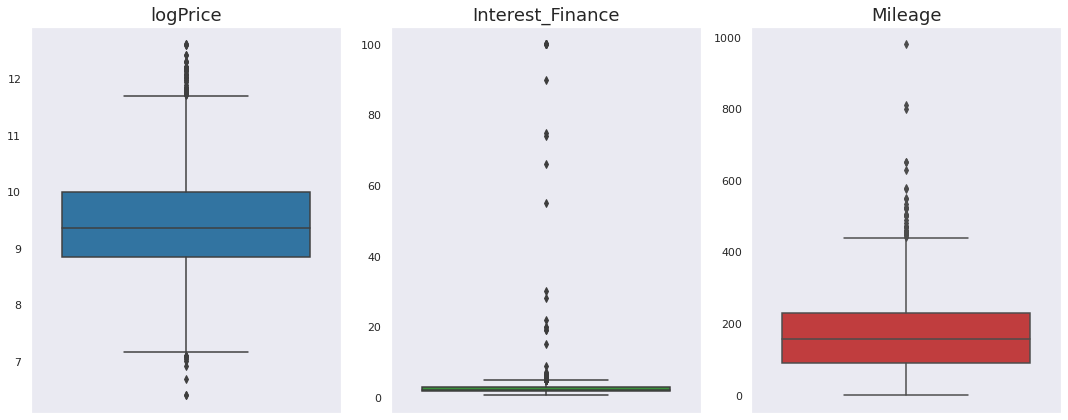

In [131]:
fig, (ax1, ax2 , ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.boxplot(y = data_transformed.logPrice, ax = ax1, color = 'tab:blue')
ax1.set_title('logPrice', fontsize = 18)
ax1.set_ylabel(None)
sns.boxplot(y = data_transformed.Interest_Finance, ax = ax2, color = 'tab:green')
ax2.set_title('Interest_Finance', fontsize = 18)
ax2.set_ylabel(None)
sns.boxplot(y = data_transformed.Mileage, ax = ax3, color = 'tab:red')
ax3.set_title('Mileage', fontsize = 18)
ax3.set_ylabel(None)


plt.show()

Delete unnormal value

In [133]:
df = data_transformed[['logPrice','Interest_Finance','Mileage']]
q3, q1 = df.quantile(0.75), df.quantile(0.25), 
iqr = q3-q1
maxm, minm = q3 + 1.5*iqr, q1 - 1.5*iqr 

print(((df < minm) | (df > (maxm))).sum())

logPrice             63
Interest_Finance    173
Mileage              36
Year                101
dtype: int64


In [134]:
data_noOL = data_transformed[~((data_transformed < minm) | (data_transformed > maxm)).any(axis=1)]

In [136]:
df = data_noOL[['logPrice','Interest_Finance','Mileage']]
print(((df < minm) | (df > (maxm))).sum())

logPrice            0
Interest_Finance    0
Mileage             0
Year                0
dtype: int64


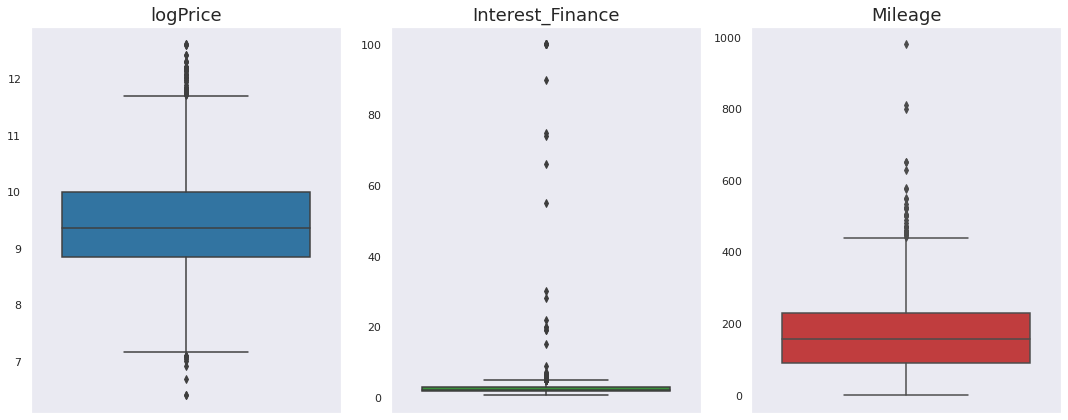

In [139]:
fig, (ax1, ax2 , ax3) = plt.subplots(nrows = 1, ncols = 3, tight_layout = True, figsize = (15, 6))
sns.boxplot(y = data_transformed.logPrice, ax = ax1, color = 'tab:blue')
ax1.set_title('logPrice', fontsize = 18)
ax1.set_ylabel(None)
sns.boxplot(y = data_transformed.Interest_Finance, ax = ax2, color = 'tab:green')
ax2.set_title('Interest_Finance', fontsize = 18)
ax2.set_ylabel(None)
sns.boxplot(y = data_transformed.Mileage, ax = ax3, color = 'tab:red')
ax3.set_title('Mileage', fontsize = 18)
ax3.set_ylabel(None)



plt.show()

In [140]:
data_unscaled = data_noOL.copy()
data_unscaled[['Mileage','Interest_Finance']].describe()

,Mileage,Interest_Finance
count,3688.000,3688.000
mean,160.696,2.347
std,95.110,0.776
min,0.000,0.600
25%,92.000,1.800
50%,158.000,2.000
75%,225.000,3.000
max,440.000,4.800



Feature Scaling

In [141]:
scaler = StandardScaler()

In [142]:
x = data_unscaled[['Mileage','Interest_Finance']]

In [143]:
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [144]:
x_scaled = scaler.transform(x)

In [145]:
data_scaled = data_unscaled.copy()

In [146]:
data_scaled[['Mileage','Interest_Finance']] = x_scaled

In [147]:
data_scaled.describe(exclude=[np.number])

,Brand,Body
count,3688,3688
unique,5,6
top,Toyota,sedan
freq,917,1366


In [151]:
data_dummies = pd.get_dummies(data_scaled,drop_first=True)

In [152]:
data_dummies.head()

,Mileage,Interest_Finance,Year,logPrice,Brand_Isuzu,Brand_Mazda,Brand_Mitsubishi,Brand_Toyota,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,1.223,-0.447,1991,8.343,0,0,1,0,0,0,1,0,0
1,2.800,0.713,1999,8.975,1,0,0,0,0,0,0,0,1
3,0.834,2.390,2007,10.043,0,1,0,0,0,0,0,0,0
4,-0.428,-0.447,2011,9.815,0,0,0,1,0,0,0,0,0
6,2.916,-0.447,1997,8.716,0,0,1,0,0,0,1,0,0


In [153]:
reference_categories = pd.DataFrame({'Variable':['Brand','Body']})
reference_categories['Reference Category'] = [np.sort(data_noOL[i].unique())[0] for i in reference_categories['Variable'].values]
reference_categories

,Variable,Reference Category
0,Brand,Honda
1,Body,crossover


Our Pre-Processed Data

In [154]:
processed_data = data_dummies.copy()
processed_data.head(15)

,Mileage,Interest_Finance,Year,logPrice,Brand_Isuzu,Brand_Mazda,Brand_Mitsubishi,Brand_Toyota,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van
0,1.223,-0.447,1991,8.343,0,0,1,0,0,0,1,0,0
1,2.800,0.713,1999,8.975,1,0,0,0,0,0,0,0,1
3,0.834,2.390,2007,10.043,0,1,0,0,0,0,0,0,0
4,-0.428,-0.447,2011,9.815,0,0,0,1,0,0,0,0,0
6,2.916,-0.447,1997,8.716,0,0,1,0,0,0,1,0,0
7,0.413,0.456,2006,9.561,0,1,0,0,0,0,0,1,0
8,0.340,-1.092,2012,9.287,0,0,0,1,0,0,0,1,0
9,0.539,-0.705,1999,7.244,0,0,0,0,0,1,0,0,0
10,0.171,-1.092,2011,9.388,0,0,0,1,0,0,0,1,0
11,1.044,-0.718,1994,7.824,0,0,0,1,0,0,1,0,0


Declaring the Target and the Predictors

In [155]:
y = processed_data['logPrice']
x = processed_data.drop('logPrice', axis =1)

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Using Statsmodels

In [157]:
x_train_df = pd.DataFrame(x_train, columns = x.columns.values)
X_train = sm.add_constant(x_train_df)
sm_model = sm.OLS(y_train,X_train).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     907.9
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        09:07:23   Log-Likelihood:                -1433.5
No. Observations:                2950   AIC:                             2893.
Df Residuals:                    2937   BIC:                             2971.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -181.5791      3.858  

In [158]:
model = LinearRegression().fit(x_train, y_train)

In [159]:
R2 = round(model.score(x_train, y_train), 3)
R2_adj = round(1 - (1-R2)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1),3)
intercept = model.intercept_.round(4)
coeff = model.coef_.round(4)

In [160]:
R = pd.DataFrame({'Metric':['R-squared','Adj. R-squared'], 'Score': [R2, R2_adj]})
R

,Metric,Score
0,R-squared,0.788
1,Adj. R-squared,0.787


In [161]:
weights = pd.DataFrame({'Parameter': np.append('const', x.columns.values), 'Coef': np.append(intercept, coeff)})
weights

,Parameter,Coef
0,const,-181.579
1,Mileage,-0.114
2,Interest_Finance,0.276
3,Year,0.095
4,Brand_Isuzu,0.187
5,Brand_Mazda,0.089
6,Brand_Mitsubishi,0.004
7,Brand_Toyota,-0.188
8,Body_hatch,-0.314
9,Body_other,-0.203


Evaluating the model (Training Data)

In [162]:
y_hat_train = model.predict(x_train)

In [163]:
eval_df_train = pd.DataFrame({'Predicted': y_hat_train, 
                              'Observed': y_train, 
                              'Residual': y_hat_train - y_train,
                              'Abs. Error': np.abs(y_hat_train - y_train)
                             }
)

In [164]:
eval_df_train.head(8)

,Predicted,Observed,Residual,Abs. Error
1172,11.272,11.225,0.047,0.047
1370,9.298,9.071,0.227,0.227
114,9.814,9.315,0.499,0.499
54,9.379,9.127,0.252,0.252
3053,9.975,9.433,0.541,0.541
2151,10.928,11.184,-0.257,0.257
1475,9.562,9.510,0.051,0.051
28,9.364,9.048,0.316,0.316


In [165]:
pd.set_option('display.float_format', '{:.3f}'.format)
eval_df_train.describe()

,Predicted,Observed,Residual,Abs. Error
count,2950.000,2950.000,2950.000,2950.000
mean,9.392,9.392,0.000,0.311
std,0.758,0.854,0.393,0.241
min,7.074,7.170,-1.620,0.000
25%,8.877,8.882,-0.264,0.129
50%,9.393,9.333,-0.049,0.263
75%,9.924,9.932,0.262,0.437
max,11.350,11.660,2.072,2.072


In [166]:
eval_df_train['Residual'].mean()

1.9320138709205774e-14

In [167]:
MAE = mean_absolute_error(y_train, y_hat_train)
RMSE = np.sqrt(mean_squared_error(y_train, y_hat_train))

In [168]:
metrics_train = pd.DataFrame({'Metric': ['R-squared', 'Adj. R-squared', 'MAE', 'RMSE'], 
                        'Score': [R2, R2_adj, MAE, RMSE]})
metrics_train

,Metric,Score
0,R-squared,0.788
1,Adj. R-squared,0.787
2,MAE,0.311
3,RMSE,0.393


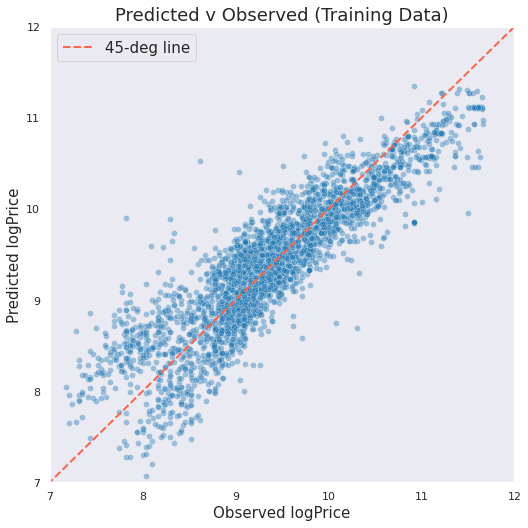

In [171]:
plt.figure(figsize = (7.5,7.5), tight_layout = True)
sns.scatterplot(x = y_train, y = y_hat_train, alpha = 0.4, color = 'tab:blue')
plt.xlabel('Observed logPrice', fontsize = 15)
plt.ylabel('Predicted logPrice', fontsize = 15)
plt.xlim(7,12)
plt.ylim(7,12)
plt.title('Predicted v Observed (Training Data)', fontsize = 18)
plt.plot([0, 12], [0, 12], color = 'tomato', ls = '--', lw = 2, label = '45-deg line')
plt.legend(fontsize = 15)
plt.show()

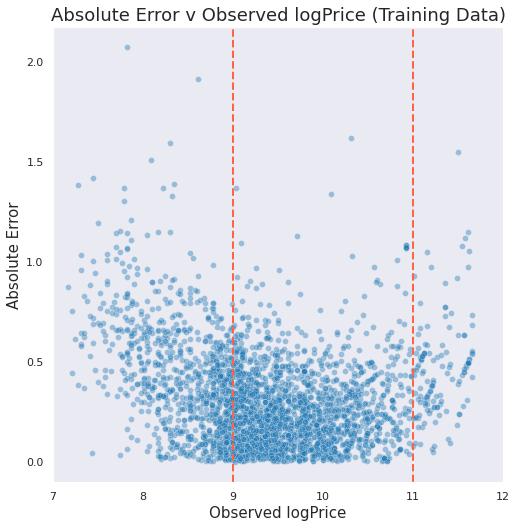

In [172]:
plt.figure(figsize = (7.5,7.5), tight_layout = True)
sns.scatterplot(x = y_train, y = eval_df_train['Abs. Error'], alpha = 0.4, color = 'tab:blue')
plt.axvline(x = 11, ls = '--', lw = 2, color = 'tomato', label = '11')
plt.axvline(x = 9, ls = '--', lw = 2, color = 'tomato', label = '9')
plt.title('Absolute Error v Observed logPrice (Training Data)', fontsize = 18)
plt.xlabel('Observed logPrice', fontsize = 15)
plt.ylabel('Absolute Error', fontsize = 15)
plt.xlim(7,12)
plt.show()

Testing the Model

Making Predictions

In [173]:
y_hat = model.predict(x_test)

Evaluating the results

In [174]:
eval_df = pd.DataFrame({'Predicted': y_hat, 
                        'Observed': y_test, 
                        'Residual': y_hat - y_test, 
                        'Abs. Error': np.abs(y_hat - y_test)})

In [175]:
eval_df.describe()

,Predicted,Observed,Residual,Abs. Error
count,738.000,738.000,738.000,738.000
mean,9.433,9.427,0.006,0.302
std,0.738,0.826,0.391,0.248
min,7.325,7.236,-1.038,0.001
25%,8.915,8.899,-0.250,0.118
50%,9.439,9.384,-0.049,0.249
75%,9.951,9.952,0.247,0.418
max,11.273,11.687,2.115,2.115


In [177]:
R2 = model.score(x_test, y_test)
R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
MAE = mean_absolute_error(y_test, y_hat)
RMSE = np.sqrt(mean_squared_error(y_test, y_hat))

metrics = pd.DataFrame({'Metric': ['R-squared', 'Adj. R-squared', 'MAE', 'RMSE'], 
                        'Score': [R2, R2_adj, MAE, RMSE]})
metrics

,Metric,Score
0,R-squared,0.776
1,Adj. R-squared,0.772
2,MAE,0.302
3,RMSE,0.390


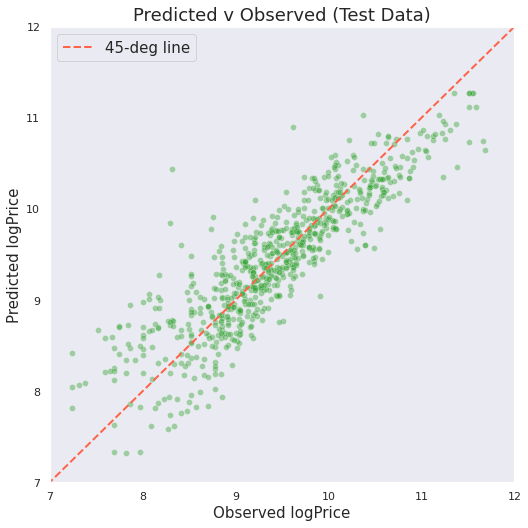

In [178]:
plt.figure(figsize = (7.5, 7.5), tight_layout = True)
sns.scatterplot(x = y_test, y = y_hat, alpha = 0.4, color = 'tab:green')
plt.xlabel('Observed logPrice', fontsize = 15)
plt.ylabel('Predicted logPrice', fontsize = 15)
plt.xlim(7,12)
plt.ylim(7,12)
plt.title('Predicted v Observed (Test Data)', fontsize = 18)
plt.plot([0, 12], [0, 12], color = 'tomato', ls = '--', lw = 2, label = '45-deg line')
plt.legend(fontsize = 15)
plt.show()